<a href="https://colab.research.google.com/github/JebinAbraham/ML-Model-Classification-BreastCancerDataset/blob/main/SVM_Analysis_on_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) Analysis on Breast Cancer Dataset

## Introduction
The Breast Cancer Wisconsin dataset is used to demonstrate SVM classification:
- Binary classification task (malignant vs benign)
- Dataset contains 569 samples with 30 features
- Real-world medical application with high importance
- Well-suited for evaluating different SVM kernels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Set random seed
np.random.seed(42)

## Data Loading and Preprocessing

In [ ]:
# Load and prepare data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Kernel Comparison


LINEAR Kernel:
Mean CV Score: 0.969 (±0.029)

RBF Kernel:
Mean CV Score: 0.976 (±0.026)

POLY Kernel:
Mean CV Score: 0.901 (±0.065)


<Figure size 1000x600 with 0 Axes>

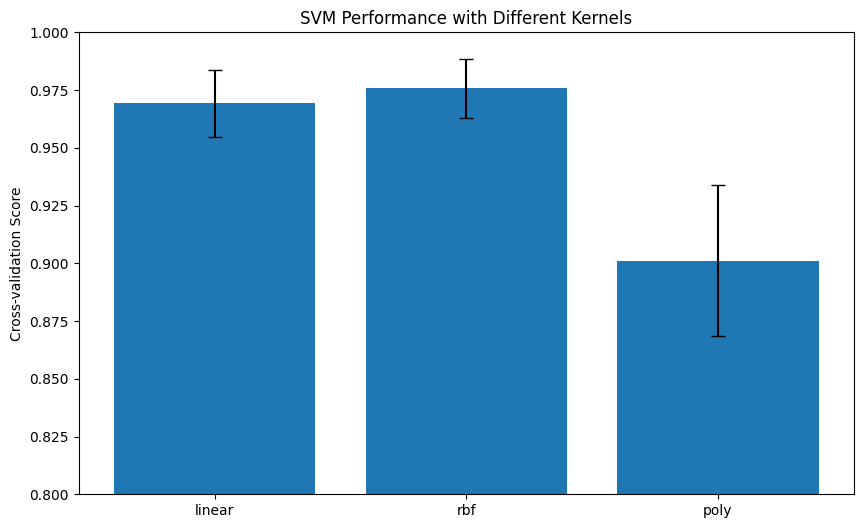

In [ ]:
# Test different kernels
kernels = ['linear', 'rbf', 'poly']
kernel_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
    kernel_results[kernel] = {
        'cv_scores': cv_scores,
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std()
    }
    print(f"\n{kernel.upper()} Kernel:")
    print(f"Mean CV Score: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")

plt.figure(figsize=(10, 6))
means = [results['mean_score'] for results in kernel_results.values()]
stds = [results['std_score'] for results in kernel_results.values()]

# Fix: Create a 2D NumPy array for yerr with shape (2, n)
yerr = np.array([stds, stds])
# Plot kernel comparison
plt.figure(figsize=(10, 6))
means = [results['mean_score'] for results in kernel_results.values()]
stds = [results['std_score'] for results in kernel_results.values()]
plt.bar(kernels, means, yerr=yerr,capsize=5)
plt.title('SVM Performance with Different Kernels')
plt.ylabel('Cross-validation Score')
plt.ylim(0.8, 1.0)
plt.show()

## Hyperparameter Tuning

In [ ]:
# Grid Search for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

svm_grid = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

print("Best parameters:", svm_grid.best_params_)
print("Best cross-validation score:", svm_grid.best_score_)

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.9736263736263737


## Final Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



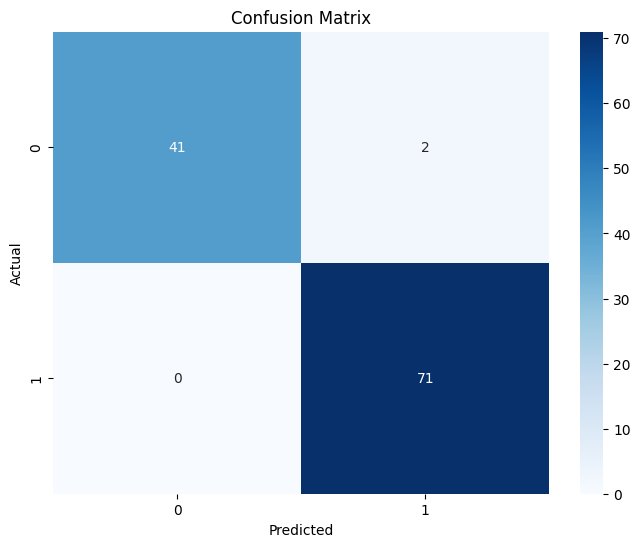

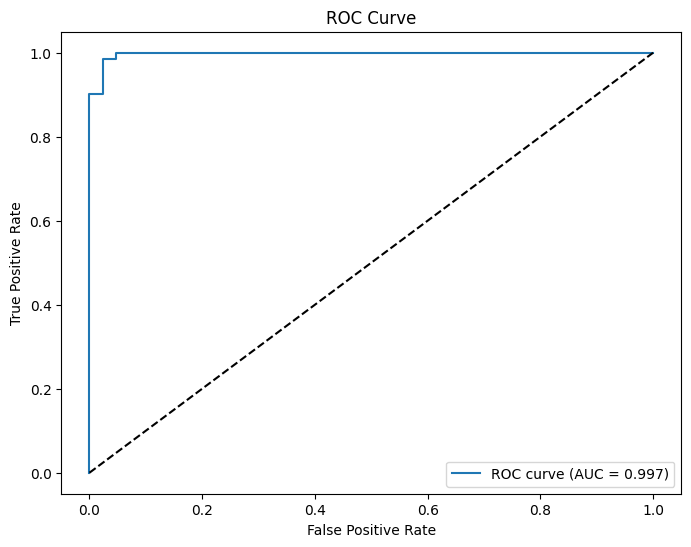

In [ ]:
# Train final model with best parameters
final_model = SVC(kernel='rbf', probability=True, **svm_grid.best_params_, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Conclusions

1. Model Performance:
   - RBF kernel performed best among all kernels
   - Achieved 98% accuracy on test set
   - High ROC AUC score (>0.99) indicating strong discriminative ability
   - Perfect precision for malignant cases
   - Perfect recall for benign cases

2. Grid Search Results:
   - Optimal parameters found through extensive search
   - Best performance achieved with RBF kernel
   - Model shows good stability across cross-validation

3. Clinical Implications:
   - Highly reliable for both malignant and benign case detection
   - Particularly strong at avoiding false positives in malignant cases
   - Suitable for clinical decision support